In [6]:
import descarteslabs.workflows as wf
import datetime

In [2]:
col = wf.ImageCollection.from_id("airbus:oneatlas:phr:v2")

In [15]:
img = col.head(10).mean("images")

In [21]:
print(img.properties['date'].year)





In [8]:
REF_DATE = datetime.date(2011,6,30)
    

In [9]:
def getDateDiff(img):
    imDate = img.properties['date']
    offset = abs(imDate - REF_DATE)
    return offset   


In [22]:
offsets = col.map(getDateDiff)

In [23]:
offsets

<descarteslabs.workflows.types.containers.list_.List[Timedelta] at 0x7f3d00d2c210>

In [24]:
sorted_coll = col.sorted(key=lambda img: getDateDiff(img))

In [31]:
mos = sorted_coll.mosaic()

geometry = wf.Geometry.from_geojson({
        "type": "Polygon",
        "coordinates": [
          [
            [
              72.77, 18.88
            ],
            [
                 72.985,18.88
            ],
            [
              72.985,19.28
            ],
            [
              72.77,19.28
            ],
            [
              72.77,18.88
            ]
          ]
        ]
      })

In [30]:
geoctx = wf.GeoContext(geometry=geometry, crs='EPSG:3857', resolution=20.0)

In [32]:
image_result = mos.pick_bands("red green blue").scale_values(0, 1, 0.0, 0.4).compute(geoctx=geoctx)


Job ID: 16d57bb144d82d0914ce76a70744cc43e92a86d9ca8586ce
[######] | Steps: 1655/1655 | Stage: SUCCEEDED                                

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


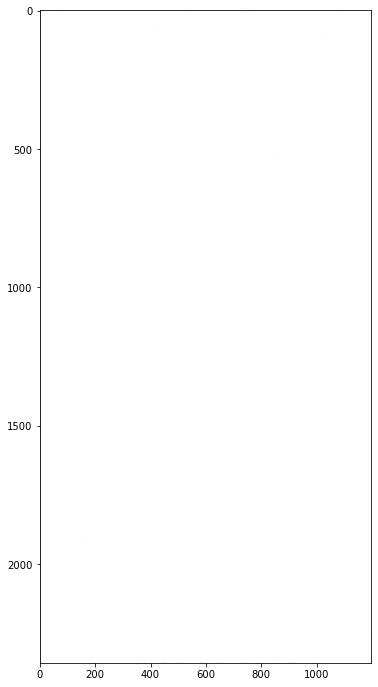

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12,12])
plt.imshow(image_result.ndarray.transpose((1,2,0)))


In [38]:
layer = mos.pick_bands("red green blue").visualize("rgb layer", scales=[[0,255], [0,255], [0,255]])
wf.map


`ipyleaflet` and/or `ipywidgets` Jupyter extensions are not installed! (or you're not in a Jupyter notebook.)
To install for JupyterLab, run this in a cell:
    !jupyter labextension install jupyter-leaflet @jupyter-widgets/jupyterlab-manager
To install for plain Jupyter Notebook, run this in a cell:
    !jupyter nbextension enable --py --sys-prefix ipyleaflet
Then, restart the kernel and refresh the webpage.
